In [71]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [72]:
height, width = 200, 200

In [73]:
img = Image.open('../assets/low_contrast_rbc.png').resize((height, width)).convert('L')
arr = np.array(img)

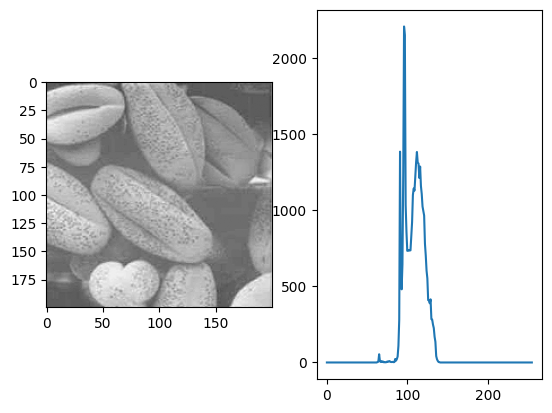

In [74]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(img, 'gray')
axes[1].plot(img.histogram())

In [75]:
# creating normalized histogram

pdf = img.histogram()
for i in range(len(pdf)):
    pdf[i] = pdf[i] / (height * width)

In [76]:
# creating normalized cumulative histogram

cdf = img.histogram()
total = 0
for i in range(len(cdf)):
    total += pdf[i]
    cdf[i] = total

Text(0.5, 1.0, 'Cumulative')

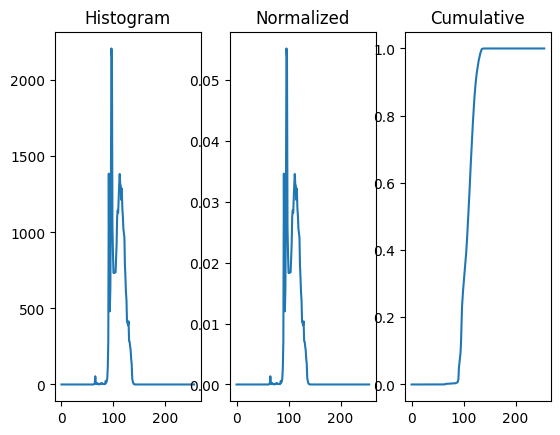

In [77]:
fig, axes = plt.subplots(1, 3)
axes[0].plot(img.histogram())
axes[0].set_title('Histogram')
axes[1].plot(pdf)
axes[1].set_title('Normalized')
axes[2].plot(cdf)
axes[2].set_title('Cumulative')

In [78]:
better_arr = arr.copy()
for i in range(height):
    for j in range(width):
        # transformation function
        # s = round(255 * cum_hist[r])
        better_arr[i, j] = round(cdf[better_arr[i, j]] * 255)

In [79]:
betterimg = Image.fromarray(better_arr, 'L')

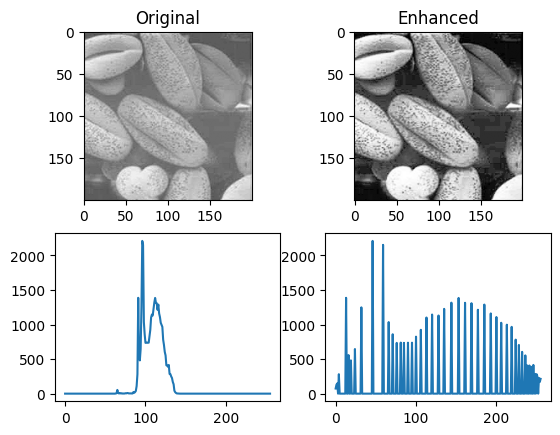

In [80]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].set_title('Original')
axes[0, 0].imshow(img, 'gray')
axes[1, 0].plot(img.histogram())
axes[0, 1].set_title('Enhanced')
axes[0, 1].imshow(betterimg, 'gray')
axes[1, 1].plot(betterimg.histogram())